In [ ]:
!pip install mysql-connector-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.9/33.9 MB 47.3 MB/s eta 0:00:00


In [ ]:
import mysql.connector
mydb = mysql.connector.connect(
 host="gateway01.ap-southeast-1.prod.aws.tidbcloud.com",
 user="4M3iohCkVE5wgKs.root",
 password="Zdw2MzDP3OvS1K5d",
 port="4000",
)


print(mydb)
mycursor = mydb.cursor(buffered=True)

In [ ]:
!pip install tabulate

In [ ]:
mycursor.execute("select * from siva.IMDB")

out=mycursor.fetchall()
from tabulate import tabulate
print(mycursor)
print(tabulate(out,headers=[i[0] for i in mycursor.description],  tablefmt='psql'))

MySQLCursorBuffered: select * from siva.IMDB
+--------------------------------------------------------------------------------------------------------------------------------------------------------+----------+---------+------------+-----------+
| title                                                                                                                                                  |   rating |   votes |   duration | genre     |
|--------------------------------------------------------------------------------------------------------------------------------------------------------+----------+---------+------------+-----------|
| Mahavatar Narsimha                                                                                                                                     |      9.2 |   31000 |   2.16667  | Action    |
| Freaky Tales                                                                                                                                         

In [ ]:
mycursor.execute("SELECT * FROM siva.IMDnB ORDER BY ratig DESC,votes DESC LIMIT 10")

top_movies = mycursor.fetchall()

from tabulate import tabulate
print(tabulate(top_movies, headers=[i[0] for i in mycursor.description],  tablefmt='psql'))

+---------------------------------+----------+---------+------------+-----------+
| title                           |   rating |   votes |   duration | genre     |
|---------------------------------+----------+---------+------------+-----------|
| Mi Ilustrísimo Amigo            |      9.8 |       6 |    1.33333 | History   |
| Tears of Blood                  |      9.7 |       8 |    1.46667 | History   |
| Thayyal Machine                 |      9.6 |    1000 |    1.51667 | Horror    |
| Among Neighbors                 |      9.6 |      53 |    1.66667 | Animation |
| Brotherhood of Blades Kill Evil |      9.4 |     135 |    1.4     | Action    |
| Yentha Panichesav Chanti        |      9.4 |      86 |    2.25    | Action    |
| Happy Birthday Luci             |      9.4 |      61 |    1.65    | Horror    |
| Colour Palette                  |      9.4 |      53 |    1.45    | Adventure |
| Marine Drive                    |      9.4 |      52 |    1.75    | Action    |
| Rudra: The Beg

In [ ]:
mycursor.execute("SELECT * FROM siva.IMDB ORDER BY votes DESC LIMIT 10")

top_movies = mycursor.fetchall()

from tabulate import tabulate
print(tabulate(top_movies, headers=[i[0] for i in mycursor.description],  tablefmt='psql'))

+-------------------------+----------+---------+------------+-----------+
| title                   |   rating |   votes |   duration | genre     |
|-------------------------+----------+---------+------------+-----------|
| Dune: Part Two          |      8.5 |  658000 |    2.76667 | Action    |
| Deadpool & Wolverine    |      7.5 |  521000 |    2.13333 | Action    |
| The Substance           |      7.2 |  332000 |    2.35    | Horror    |
| Furiosa: A Mad Max Saga |      7.5 |  298000 |    2.46667 | Action    |
| Gladiator II            |      6.5 |  269000 |    2.46667 | Action    |
| Alien: Romulus          |      7.1 |  261000 |    1.98333 | Horror    |
| Civil War               |      7   |  249000 |    1.81667 | Action    |
| The Fall Guy            |      6.8 |  233000 |    2.1     | Action    |
| Inside Out 2            |      7.5 |  229000 |    1.6     | Adventure |
| Nosferatu               |      7.2 |  227000 |    2.2     | Horror    |
+-------------------------+----------+

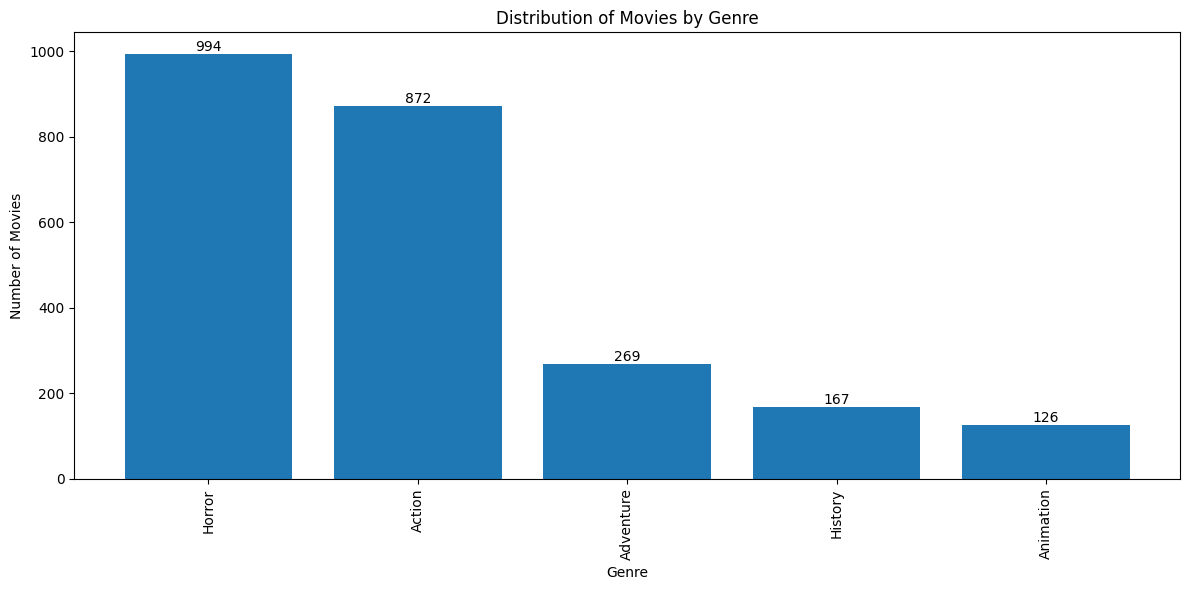

In [ ]:
mycursor.execute("SELECT genre, COUNT(*) FROM siva.IMDB GROUP BY genre ORDER BY COUNT(*) DESC")
genre_counts = mycursor.fetchall()

import matplotlib.pyplot as plt

genres = [row[0] for row in genre_counts]
counts = [row[1] for row in genre_counts]

plt.figure(figsize=(12, 6))
bars = plt.bar(genres, counts)
plt.xlabel("Genre")
plt.ylabel("Number of Movies")
plt.title("Distribution of Movies by Genre")
plt.xticks(rotation=90)

# Add data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center') # va: vertical alignment, ha: horizontal alignment


plt.tight_layout()
plt.show()

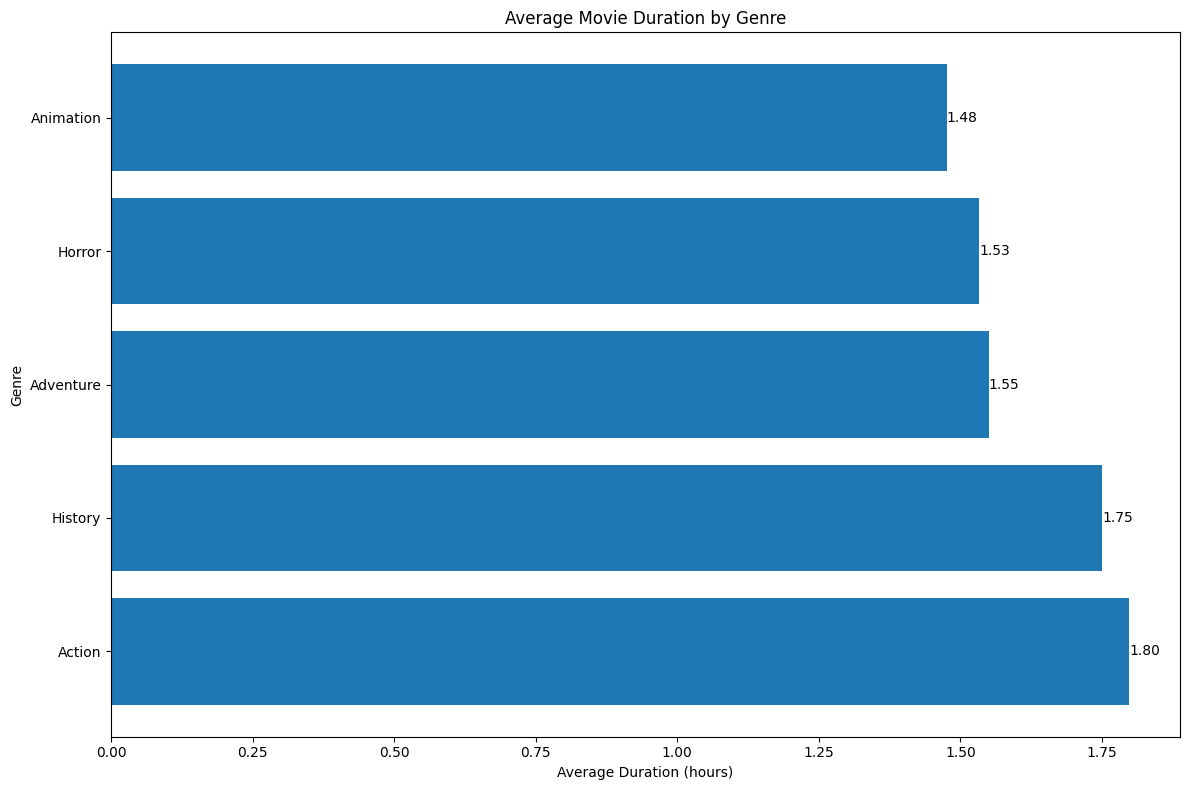

In [ ]:
mycursor.execute("SELECT genre, AVG(duration) FROM siva.IMDB GROUP BY genre ORDER BY AVG(duration) DESC")
average_duration_by_genre = mycursor.fetchall()

import matplotlib.pyplot as plt

genres = [row[0] for row in average_duration_by_genre]
durations = [row[1] for row in average_duration_by_genre]

plt.figure(figsize=(12, 8))
bars = plt.barh(genres, durations)
plt.xlabel("Average Duration (hours)")
plt.ylabel("Genre")
plt.title("Average Movie Duration by Genre")


# Add data labels
for bar in bars:
    xval = bar.get_width()
    plt.text(xval, bar.get_y() + bar.get_height()/2, f'{xval:.2f}', va='center', ha='left') # va: vertical alignment, ha: horizontal alignment


plt.tight_layout()
plt.show()

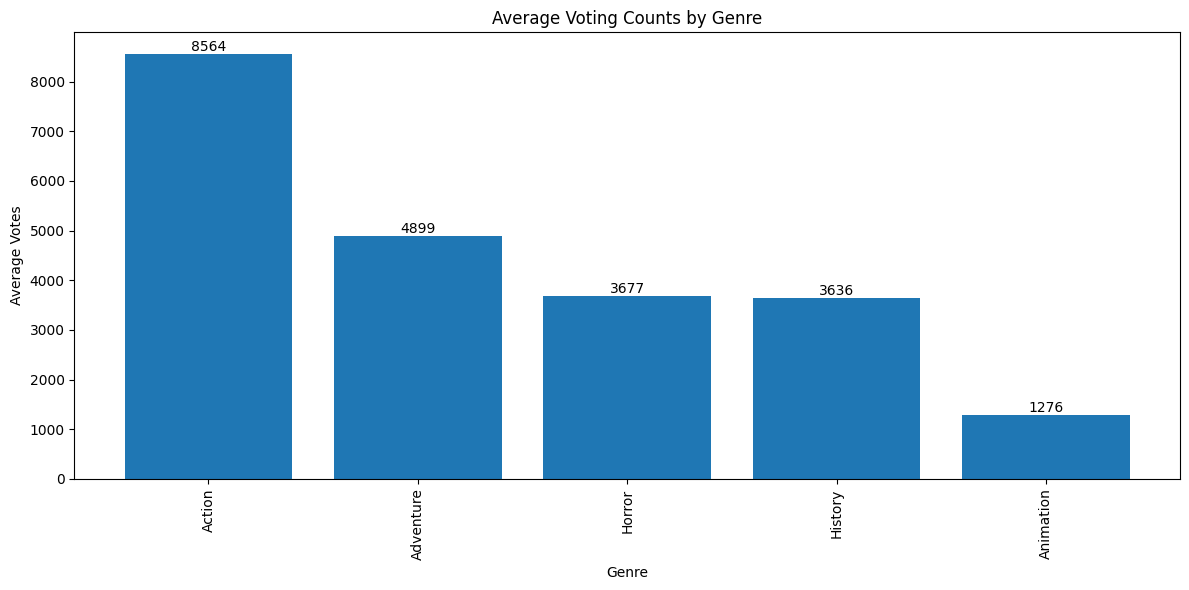

In [ ]:
mycursor.execute("SELECT genre, AVG(votes) FROM siva.IMDB GROUP BY genre ORDER BY AVG(votes) DESC")
average_votes_by_genre = mycursor.fetchall()

import matplotlib.pyplot as plt

genres = [row[0] for row in average_votes_by_genre]
votes = [row[1] for row in average_votes_by_genre]

plt.figure(figsize=(12, 6))
bars = plt.bar(genres, votes)
plt.xlabel("Genre")
plt.ylabel("Average Votes")
plt.title("Average Voting Counts by Genre")
plt.xticks(rotation=90)

# Add data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.0f}', va='bottom', ha='center') # va: vertical alignment, ha: horizontal alignment


plt.tight_layout()
plt.show()

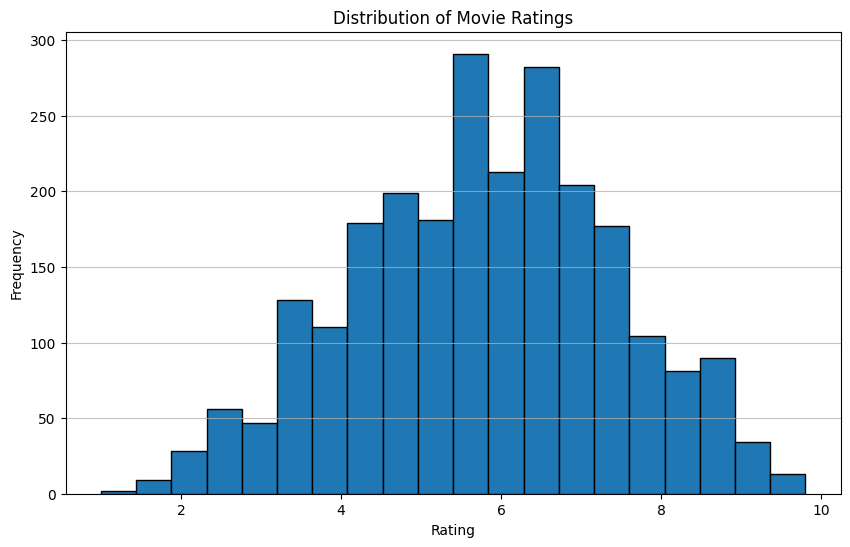

In [ ]:
mycursor.execute("SELECT rating FROM siva.IMDB")
ratings = mycursor.fetchall()

import matplotlib.pyplot as plt

# Extract ratings from the fetched data
movie_ratings = [row[0] for row in ratings]

plt.figure(figsize=(10, 6))
plt.hist(movie_ratings, bins=20, edgecolor='black') # Using 20 bins for better granularity
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.title("Distribution of Movie Ratings")
plt.grid(axis='y', alpha=0.75)
plt.show()

In [ ]:
mycursor.execute("""
    SELECT
        t1.title,
        t1.rating,
        t1.genre
    FROM
        siva.IMDB t1
    INNER JOIN (
        SELECT
            genre,
            MAX(rating) AS max_rating
        FROM
            siva.IMDB
        GROUP BY
            genre
    ) t2 ON t1.genre = t2.genre AND t1.rating = t2.max_rating
    ORDER BY
        t1.rating DESC;
""")

top_rated_by_genre = mycursor.fetchall()

from tabulate import tabulate
print(tabulate(top_rated_by_genre, headers=[i[0] for i in mycursor.description],  tablefmt='psql'))

+---------------------------------+----------+-----------+
| title                           |   rating | genre     |
|---------------------------------+----------+-----------|
| Mi Ilustrísimo Amigo            |      9.8 | History   |
| Among Neighbors                 |      9.6 | Animation |
| Thayyal Machine                 |      9.6 | Horror    |
| Marine Drive                    |      9.4 | Action    |
| Brotherhood of Blades Kill Evil |      9.4 | Action    |
| Rudra: The Beginning            |      9.4 | Action    |
| Yentha Panichesav Chanti        |      9.4 | Action    |
| Colour Palette                  |      9.4 | Adventure |
| A Christmas Carol               |      9.4 | Adventure |
| The Long Quiet                  |      9.4 | Adventure |
+---------------------------------+----------+-----------+


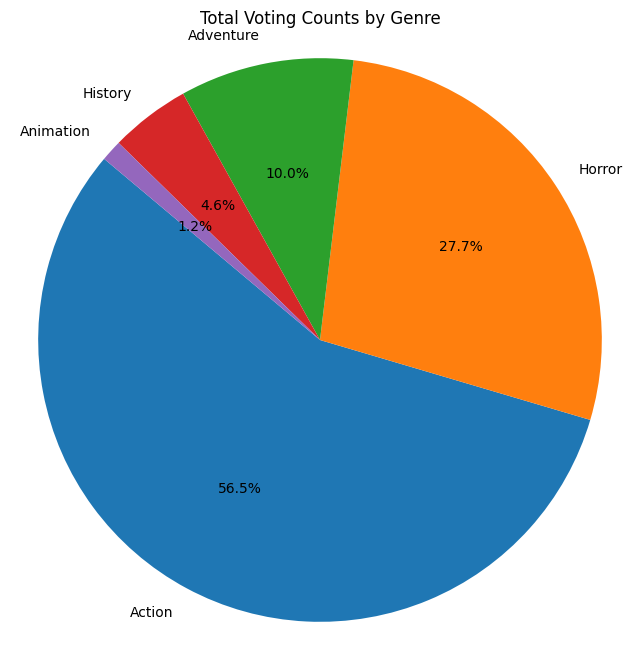

In [ ]:
mycursor.execute("SELECT genre, SUM(votes) FROM siva.IMDB GROUP BY genre ORDER BY SUM(votes) DESC")
total_votes_by_genre = mycursor.fetchall()

import matplotlib.pyplot as plt

genres = [row[0] for row in total_votes_by_genre]
votes = [row[1] for row in total_votes_by_genre]

plt.figure(figsize=(8, 8))
plt.pie(votes, labels=genres, autopct='%1.1f%%', startangle=140)
plt.title("Total Voting Counts by Genre")
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
mycursor.execute("SELECT title, duration FROM siva.IMDB ORDER BY duration ASC LIMIT 1")
shortest_movie = mycursor.fetchone()

mycursor.execute("SELECT title, duration FROM siva.IMDB ORDER BY duration DESC LIMIT 1")
longest_movie = mycursor.fetchone()

from tabulate import tabulate
print("Shortest Movie:")
print(tabulate([shortest_movie], headers=["title", "duration"], tablefmt='psql'))
print("\nLongest Movie:")
print(tabulate([longest_movie], headers=["title", "duration"], tablefmt='psql'))

Shortest Movie:
+----------+------------+
| title    |   duration |
|----------+------------|
| The Vent |       0.05 |
+----------+------------+

Longest Movie:
+--------------------------------------------------------------------+------------+
| title                                                              |   duration |
|--------------------------------------------------------------------+------------|
| In Search of Darkness 1990-1994: A Journey Into Iconic '90s Horror |       6.05 |
+--------------------------------------------------------------------+------------+


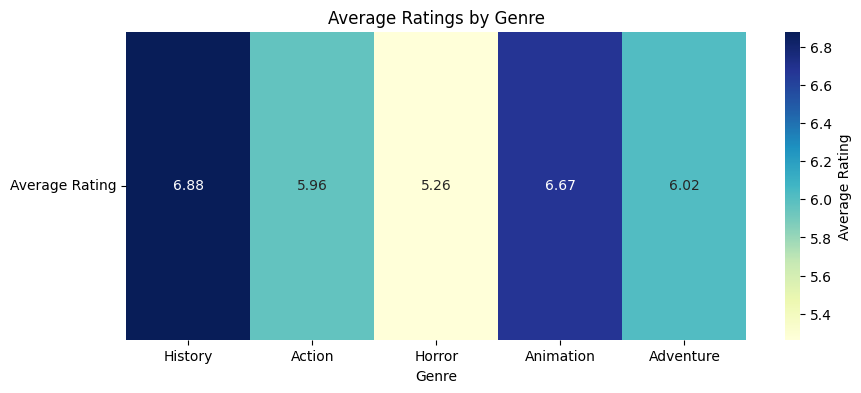

In [ ]:
mycursor.execute("SELECT genre, AVG(rating) FROM siva.IMDB GROUP BY genre")
average_rating_by_genre = mycursor.fetchall()

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the fetched data into a pandas DataFrame
df_avg_rating = pd.DataFrame(average_rating_by_genre, columns=['Genre', 'Average Rating'])

# Pivot the DataFrame to create a format suitable for a heatmap
# Since we only have one value per genre, we'll create a single row heatmap
df_heatmap = df_avg_rating.set_index('Genre').T

plt.figure(figsize=(10, 4))
sns.heatmap(df_heatmap, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Average Rating'})
plt.title("Average Ratings by Genre")
plt.yticks(rotation=0) # Keep y-axis labels horizontal
plt.show()

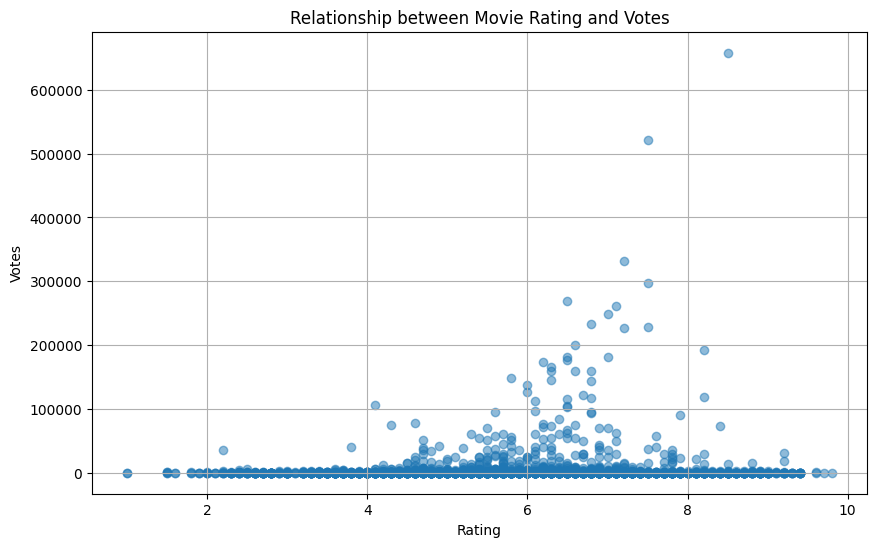

In [ ]:
mycursor.execute("SELECT rating, votes FROM siva.IMDB")
rating_votes_data = mycursor.fetchall()

import matplotlib.pyplot as plt

# Extract ratings and votes from the fetched data
ratings = [row[0] for row in rating_votes_data]
votes = [row[1] for row in rating_votes_data]

plt.figure(figsize=(10, 6))
plt.scatter(ratings, votes, alpha=0.5) # Use alpha for transparency in case of overlapping points
plt.xlabel("Rating")
plt.ylabel("Votes")
plt.title("Relationship between Movie Rating and Votes")
plt.grid(True)
plt.show()